### Rayleigh-Plesset Equation

$$R\frac{d^2 R}{dt^2}+\frac{3}{2}\left(\frac{dR}{dt}\right)^2=-\frac{\Delta P(t)}{\rho}-\frac{2\sigma}{\rho R}-\frac{4\nu}{R}\frac{dR}{dt}\tag{1}$$

To solve the equation we need to specify $\Delta P$, which is pressure difference between gas in bubble $p_g$ and the pressure far from bubble $p_\infty$:

$$\Delta P =p_\infty(t) - p_g(t)\tag{2}$$

The pressure far from the bubble is a static presssure $p_0$ plus an acoustic pressure with amplitude $p_a$:

$$p_\infty(t) = p_0+p_a\sin(2 \pi f t)\tag{3}$$

This harmonic acoustic pressure is driving the bubble.

For the pressure in the bubble we use the ideal gas law with the polytropic exponent $\kappa$:

$$p_g(t) V(t)^\kappa=p_{g,0} V_0^\kappa\tag{4}$$

The pressure of the bubble $R=R_0$ at rest $p_{g,0}$ needs to account for the Laplace pressure:
$$p_{g,0}=p_0+\frac{2\sigma}{R_0}\tag{5}$$


Thus we obtain for the gas pressure:
$$p_g(t)=\left(p_0+\frac{2\sigma}{R_0}\right)\left(\frac{R_0}{R(t)}\right)^{3\kappa}\tag{6}$$


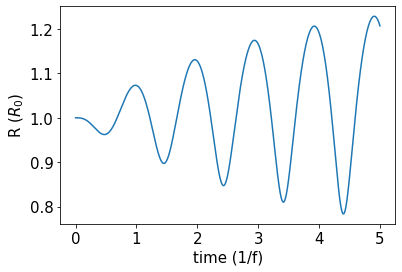

In [141]:
%matplotlib inline 

import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np 
import matplotlib as mpl
mpl.rcParams['font.size'] = 15


#Rayleigh Plesset Equation
def rp(y,t):
    R=y[0]
    U=y[1]
    pinfty = p0+pa*np.sin(2*np.pi*f*t)   #Eq. (3)
    pg0 = p0+2.*sigma/R0     #Eq. (5)
    pg=pg0*(R0/R)**(3*kappa) #Eq. (6)
    Deltap=pinfty-pg #Eq. (2)

    dydt0 = y[1]         
    dydt1 = 1./R*(-Deltap/rho-4.*nu*U/R-2.*sigma/rho/R-1.5*U*U) #Eq. (1) solved for d2R/dt2

    return [dydt0,dydt1]

p0=1e5            # ambient pressure [Pa]
rho=1e3           # density of the liquid [kg/m^3]
R0=3e-6
nu=1e-6           # kinematic viscosity [m^2/s]
sigma=0.072       # surface tension [N/m]
kappa=1.          # polytropic exponent [ ]
f=1e6             # frequency of driving [1/s]
pa=1e4            # acoustic pressure [Pa]

y0=[R0,0.]
t_final = 5./f

# Times for the solution
t = np.linspace(t0, t_final, 10000)

sol=odeint(rp, y0, t,h0=1./f/10000.)
R1=sol[:, 0]

plt.plot(t*f,R1/R0)
ax=plt.gca()
ax.set_xlabel(r'time (1/f)')
ax.set_ylabel(r'R ($R_0$)');


### Questions:

* How many cylces do you need before the bubble oscillates periodically with a constant amplitude?

* How to reduce this transient time? Demonstrate in a plot.

* Plot the radius time curve in the sonoluminescence regime where $R_0\approx 3\,\mu$m and $f\approx 20\,$kHz.


### Resonane curve

Next we plot for a specific range of $R_0$ the amplitude of the bubble pulsation. 


In [143]:
p0=1e5            # ambient pressure [Pa]
rho=1e3           # density of the liquid [kg/m^3]
R0=3e-6
nu=5e-6           # kinematic viscosity [m^2/s]
sigma=0.072       # surface tension [N/m]
kappa=1.          # polytropic exponent [ ]
f=1e6             # frequency of driving [1/s]
pa=1e4            # acoustic pressure [Pa]

t0=0.             #start time
t_final = 100./f  # solve for 100 cylces


R0s=np.linspace(1e-6,10e-6,101) #R0s are equilibrium radii to loop over
Rmax=np.copy(R0s) #storage vector for the maximum radii

npoints=1000000

for idx, R0 in enumerate(R0s):
    # Initial condition
    y0=[R0,0.]

    # Times for the solution
    t = np.linspace(t0, t_final, npoints)

    sol=odeint(rp, y0, t,h0=1./f/10000.)
    R1=sol[-int(npoints/10):, 0]
    Rmax[idx]=R1.max()


The resonance radius $R_{res}$ in absence of damping in the linear regime is given through the following formula:

$$2\pi f=\left(\frac{3\kappa p_0}{\rho R_{res}^2}+\frac{3(3\kappa-1)\sigma}{\rho R_{res}^3}\right)^{1/2}\tag{7}$$


For details please consult the excellent online book ["Cavitation Bubble Dynamics" from Chris Brennen](https://media.library.caltech.edu/CaltechBOOK:1995.001/chap4.htm).

Equation (7) can be solved with a numerical root finder or analytically with Cardano's equations.

In [142]:
omega_r=2.*np.pi*f
l=np.roots([omega_r**2.,0,-3.*kappa*p0/rho,-2.*(3.*kappa-1.)*sigma/rho])
Rres=np.real(l[np.isreal(l)][0])
print('Resonance radius {:5.3g} m'.format(Rres))

Resonance radius 3.15e-06 m


Next we plot the amplitude response as a function of the equilibrium radius $R_0$. The amplitude response is written as
$$ \frac{R_{max}-R_0}{R_0}\quad ,$$ which is 0 when the bubble does not oscillate.

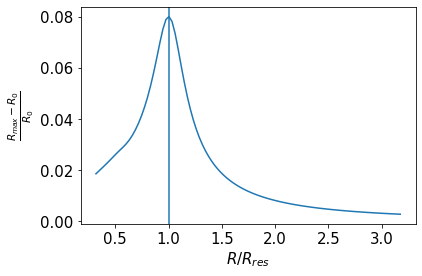

In [144]:
plt.plot(R0s/Rres,(Rmax-R0s)/R0s)
plt.axvline(x=1)
ax=plt.gca()
ax.set_ylabel(r'$\frac{R_{max}-R_0}{R_0}$')
ax.set_xlabel(r'$R/R_{res}$');

### Questions:

* What happens to the curve when the viscosity is increased? Calculate and explain qualitatively.
* Increase the pressure to 1.5bar. What happens? Why?
* Plot the amplitude response as a function of the frequency.


*Further reading material:*

[1] Werner Lauterborn and Thomas Kurz 2010 Rep. Prog. Phys. 73 106501 [link.](https://iopscience.iop.org/article/10.1088/0034-4885/73/10/106501)

[2] The Acoustic Bubble by Timothey Leighton 1994. [link](https://www.sciencedirect.com/book/9780124419209/the-acoustic-bubble#book-description)

[3] Brennen, Christopher Earls. 1995. Cavitation and Bubble Dynamics (version Public). New York: Oxford University Press. [link](https://media.library.caltech.edu/CaltechBOOK:1995.001/chap4.htm).